# Applied Data Science Capstone Project
### This notebook contains all the code for the "IBM Data Science Professional Certificate" Capstone Project

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
from sklearn import preprocessing
import scipy.stats as ss

# Introduction
Car accidents are a huge problem in the modern world. The Global Status report on road safety collected data from 180 countries and found that 1.25 million people die internationally every year from car accidents. Many governments collect accident records and make these publicly available to encourage researchers to try and find models that can explain and predict what conditions cause car accidents and hopefully help prevent them. In this project we pose the car accident injury prediction prediction as a supervised learning classification problem and offer our model to all governments.

# Data
In this project we use the collisions records dataset provided by the Seattle Police Department at Seattle.gov. The dataset contains 195,000 records of all types of collisions from the year 2004 to present, updated weekly. It includes 37 features that describe the type of collision or accident that occurred, such as: accident location, number of people involved, number of vehicles involved, time of day, weather conditions etc.  

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Dropping columns that are: irrelevant, redundant, have too many NA's, column with one dominant value etc.

In [3]:
df = df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION',
             'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'PEDCYLCOUNT', 'INCDTTM', 'SDOT_COLCODE',
             'SDOT_COLDESC', 'INATTENTIONIND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY',
             'CROSSWALKKEY', 'HITPARKEDCAR','SEVERITYCODE.1','JUNCTIONTYPE'], axis=1)
df.head(5)




,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE
0,2,Intersection,Angles,2,0,2,2013/03/27 00:00:00+00,N,Overcast,Wet,Daylight,NaN,10
1,1,Block,Sideswipe,2,0,2,2006/12/20 00:00:00+00,0,Raining,Wet,Dark - Street Lights On,NaN,11
2,1,Block,Parked Car,4,0,3,2004/11/18 00:00:00+00,0,Overcast,Dry,Daylight,NaN,32
3,1,Block,Other,3,0,3,2013/03/29 00:00:00+00,N,Clear,Dry,Daylight,NaN,23
4,2,Intersection,Angles,2,0,2,2004/01/28 00:00:00+00,0,Raining,Wet,Daylight,NaN,10


In [5]:
df.shape

(194673, 13)

### Check for unique values for each variable

In [4]:
for col in df:
    print(col, ": ",df[col].unique())

SEVERITYCODE :  [2 1]
ADDRTYPE :  ['Intersection' 'Block' 'Alley' nan]
COLLISIONTYPE :  ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
PERSONCOUNT :  [ 2  4  3  0  1  5  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT :  [0 1 2 3 4 5 6]
VEHCOUNT :  [ 2  3  1  0  4  7  5  6  8 11  9 10 12]
INCDATE :  ['2013/03/27 00:00:00+00' '2006/12/20 00:00:00+00'
 '2004/11/18 00:00:00+00' ... '2020/05/08 00:00:00+00'
 '2020/05/14 00:00:00+00' '2020/05/19 00:00:00+00']
UNDERINFL :  ['N' '0' nan '1' 'Y']
WEATHER :  ['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']
ROADCOND :  ['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
LIGHTCOND :  ['Daylight' 'Dark - Street Lights On' 'Dark - No Stree

### Correcting missing values for features UNDERINFL and SPEEDING

In [5]:
df.UNDERINFL.replace(['0'], 'N',inplace=True)
df.UNDERINFL.replace(['1'], 'Y',inplace=True)
df.SPEEDING.fillna('N',inplace=True)

### Remove NA's - the dataset is large and there are few NA's so instead of imputing I remove them

In [6]:
print(df.isnull().sum()) 
df = df.dropna()
df.count()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
VEHCOUNT            0
INCDATE             0
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
SPEEDING            0
ST_COLCODE         18
dtype: int64


SEVERITYCODE     187504
ADDRTYPE         187504
COLLISIONTYPE    187504
PERSONCOUNT      187504
PEDCOUNT         187504
VEHCOUNT         187504
INCDATE          187504
UNDERINFL        187504
WEATHER          187504
ROADCOND         187504
LIGHTCOND        187504
SPEEDING         187504
ST_COLCODE       187504
dtype: int64

In [7]:
# remove duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df = df.drop_duplicates()

number of duplicate rows:  (19643, 13)


## EDA for categorical variables
### Create new variables

In [8]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['weekday'] = df['INCDATE'].dt.dayofweek
df = df.drop(['INCDATE'], axis=1)
df.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
VEHCOUNT          int64
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
SPEEDING         object
ST_COLCODE       object
weekday           int64
dtype: object

In [12]:
# ratio in SEVERITY
df["SEVERITYCODE"].value_counts()

1    113439
2     54422
Name: SEVERITYCODE, dtype: int64

### Categorical association matrix - using Cramer's V

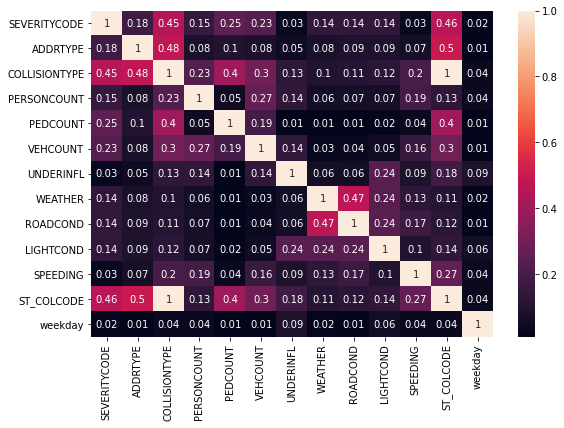

In [10]:
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# encode categorical strings to numeric
label = preprocessing.LabelEncoder()
categorical = list(df.select_dtypes(include=['object']).columns.values)
df2 = df.copy()
for cat in categorical:
    df2[cat] = label.fit_transform(df2[cat].astype(str))    

#Building of the matrix
rows= []
for var1 in df2:
    col = []
    for var2 in df2:
        cramers = cramers_v(df2[var1], df2[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = df2.columns, index = df2.columns)

#heat map
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_cramer, annot=True, ax=ax)
plt.show()

### Removing variables that are highly correlated and variables with very low correlation with SEVERITYCODE

In [9]:
df = df.drop(['ST_COLCODE','UNDERINFL','SPEEDING','weekday'], axis=1)

### Chance of injury is much higher if collision is in an intersection

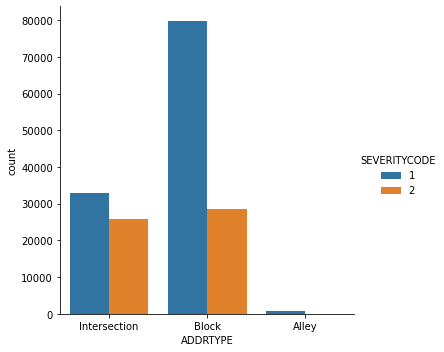

In [10]:
sns.catplot(x="ADDRTYPE", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### Chance of injury is much higher if collision is from angle or rear-ended

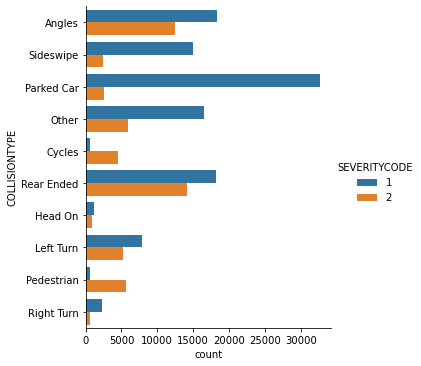

In [29]:
sns.catplot(y="COLLISIONTYPE", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### Number of persons involved in the collision

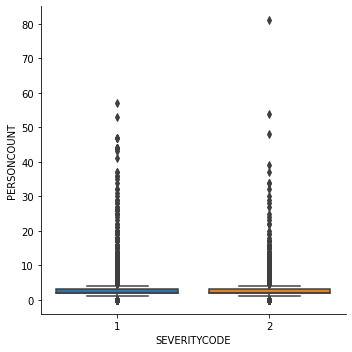

In [32]:
sns.catplot(x="SEVERITYCODE", y="PERSONCOUNT", kind="box", data=df)
plt.show()

### Number of pedestrians involved

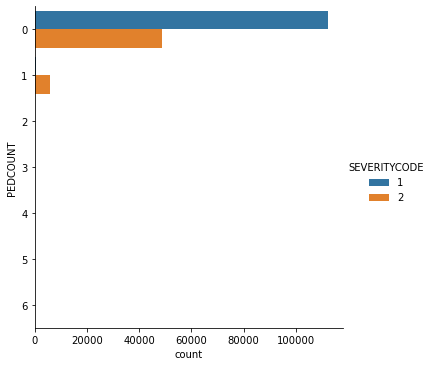

In [34]:
sns.catplot(y="PEDCOUNT", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### Number of vehicles involved - group 4+ together

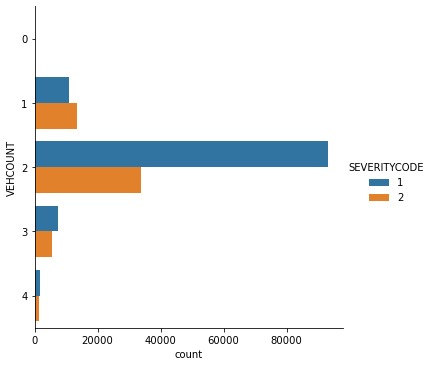

In [13]:
df.VEHCOUNT.replace([5,6,7,8,9,10,11,12], 4,inplace=True)
sns.catplot(y="VEHCOUNT", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### Weather conditions - group sparse data together

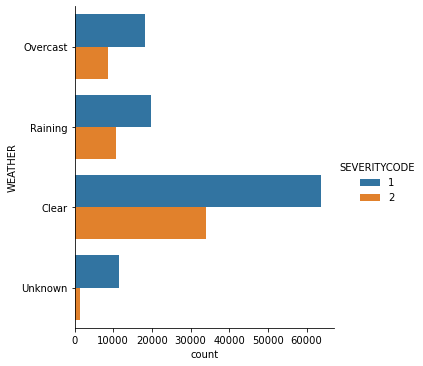

In [14]:
df.WEATHER.replace(['Other', 'Snowing', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt', 
                        'Sleet/Hail/Freezing Rain', 'Severe Crosswind','Partly Cloudy'], 
                   'Unknown',inplace=True)
sns.catplot(y="WEATHER", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### Road conditions - group sparse data together

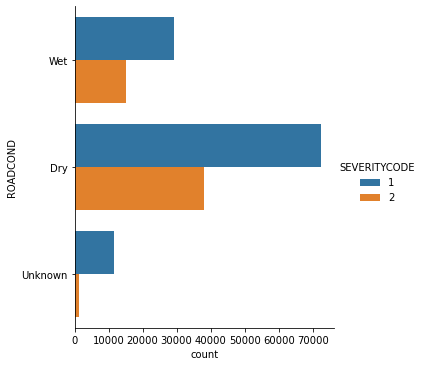

In [15]:
df.ROADCOND.replace(['Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt', 
                    'Standing Water', 'Oil'], 'Unknown',inplace=True)
sns.catplot(y="ROADCOND", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### light conditions - group sparse data together

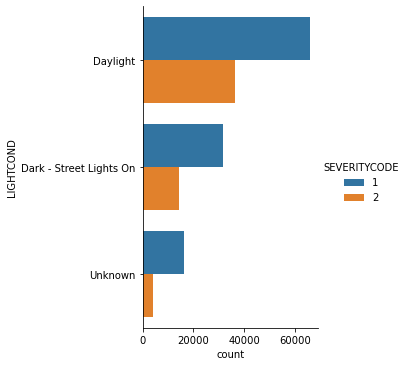

In [16]:
df.LIGHTCOND.replace(['Snow/Slush', 'Ice', 'Other', 'Sand/Mud/Dirt', 
                    'Standing Water', 'Oil','Dusk','Dawn','Dark - Street Lights Off',
                     'Dark - No Street Lights','Dark - Unknown Lighting'], 'Unknown',inplace=True)
sns.catplot(y="LIGHTCOND", hue="SEVERITYCODE", kind="count", data=df)
plt.show()

### Preprocess dataset before modeling - encode and normalize

#### Encode categorical strings to numeric

In [17]:
# One hot encoding for categorical data
df_one_hot = pd.get_dummies(data=df, columns = ['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND'])
df_one_hot.head(10)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,...,WEATHER_Clear,WEATHER_Overcast,WEATHER_Raining,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Daylight,LIGHTCOND_Unknown
0,2,2,0,2,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,2,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,4,0,3,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,1,3,0,3,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,2,2,0,2,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5,1,2,0,2,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
6,1,2,0,2,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
7,2,3,0,1,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,1,0
8,1,2,0,2,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
9,2,2,0,2,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0


In [18]:
# Convert to array and normalize
y = np.asarray(df_one_hot['SEVERITYCODE'])
X = df_one_hot.drop('SEVERITYCODE', axis=1)
X = np.asarray(X)
X = preprocessing.StandardScaler().fit(X).transform(X)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134288, 26) (134288,)
Test set: (33573, 26) (33573,)


## Modeling

### Select best model between: 
### 1. Naive Bayes
### 2. Logistic regression
### 3. Random Forest
### 4. XGBoost

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('XGB', GradientBoostingClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('model %s ROC value: %f ' % (name, cv_results.mean()))

model NB ROC value: 0.754430 
model LR ROC value: 0.772940 
model RF ROC value: 0.769749 
model XGB ROC value: 0.779173 


## Predictions

In [23]:
# fit selected model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7413397670747327
[[21637  1024]
 [ 7660  3252]]
              precision    recall  f1-score   support

           1       0.74      0.95      0.83     22661
           2       0.76      0.30      0.43     10912

   micro avg       0.74      0.74      0.74     33573
   macro avg       0.75      0.63      0.63     33573
weighted avg       0.75      0.74      0.70     33573



## Feature importance

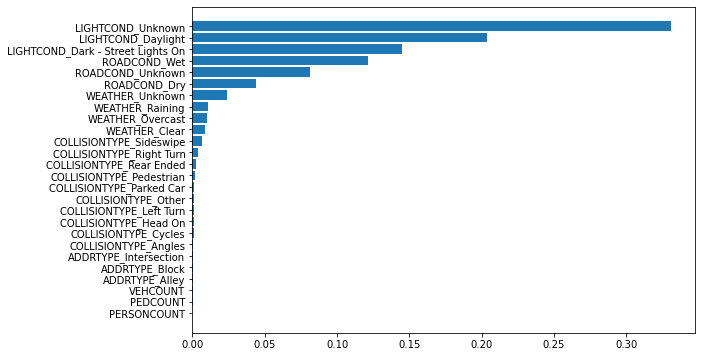

In [43]:
importance = model.feature_importances_

#plot feature importance
indices = np.argsort(importance)
plt.subplots(figsize=(9, 6))
plt.barh([x for x in range(len(importance))], importance[indices])
plt.yticks(range(len(model.feature_importances_)), df_one_hot.drop('SEVERITYCODE', axis=1).columns)
plt.show()

## Results and Discussion
Injuries caused by car accidents present an important challenge with many real life implications. In this paper, I
have described our use of various machine learning approaches to the complex problem of predicting car accident severity with the data provided through the Seattle Police Department. 

Our results indicate that it is difficult to create accurate standard machine learning models for predicting car accident severity. Since our data was skewed, optimizing for accuracy tended to produce models that classified most accidents as Property Damage Only. I instead used area under the Receiver Operating Characteristic (ROC) curve, as our performance metric.

Our most successful model was the XGBoost model that achieved an AUC of 0.78 on average in the 10-fold cross validation process, surpassing with a small margin the Logistic Regression model that achieved an AUC of 0.77. The Random Forest model obtained a slightly lower AUC of 0.77 and the Naive Bayes model got the lowest score AUC of 0.75.
The most influential features in the models were quite intuitive - light conditions, road conditions and weather conditions involved. But there were a few surprises when it turned out that speeding, drunk driving and the day of the week were not good predictors for accident severity.

The results show that the data doesn't provide much insight as to a clear difference between accidents that end with property damage and those that end with injury or death. The benchmark of 70% that is the rate of Property Damage Only accidents out of all accidents is improved by the model to 75% in the test set, an improvement but not a substantial one. 

## Conclusion
The purpose of this project was to identify car accident severity in order to determine what conditions cause car accidents and hopefully help prevent them or reduce their severity. The results show that although it is difficult to distinguish between Property Damage Only accidents and accidents with injuries, it is possible to ascertain what attributes are important and can indicate the possibility of an occurrence of a more fatal accident.

